# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


[link text](https://)# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [5]:
!pip install scikit-plot

In [6]:
import scipy
print(scipy.__version__)


1.7.3


In [7]:
!pip install scipy==1.7.3

In [8]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2


## Load Dataset

In [9]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
rayan-homework1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [14]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [12]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

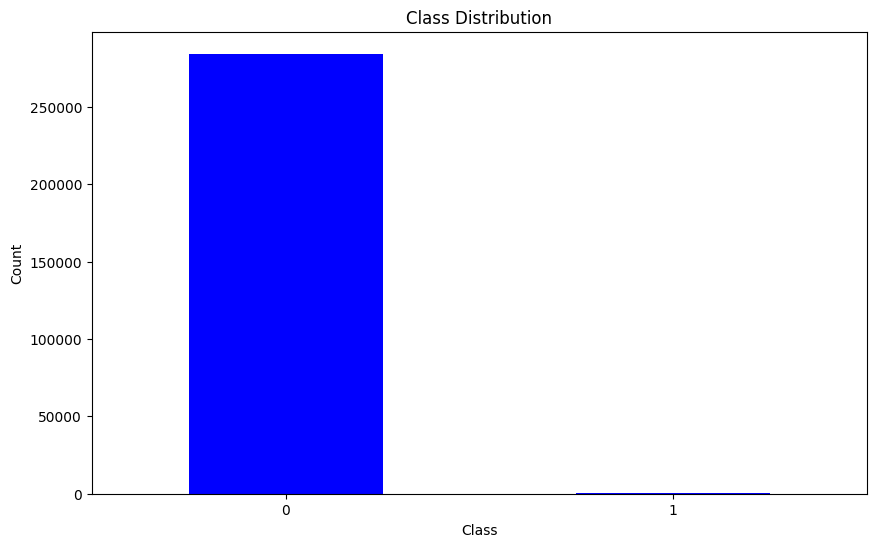

In [ ]:
# ### 2.2 Class Distribution
# Visualize the class distribution
class_distribution = df.Class.value_counts()

# Bar grafiği ile görselleştir
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='blue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
class_distribution = df.Class.value_counts(normalize=True) * 100
print(class_distribution)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


<Axes: >

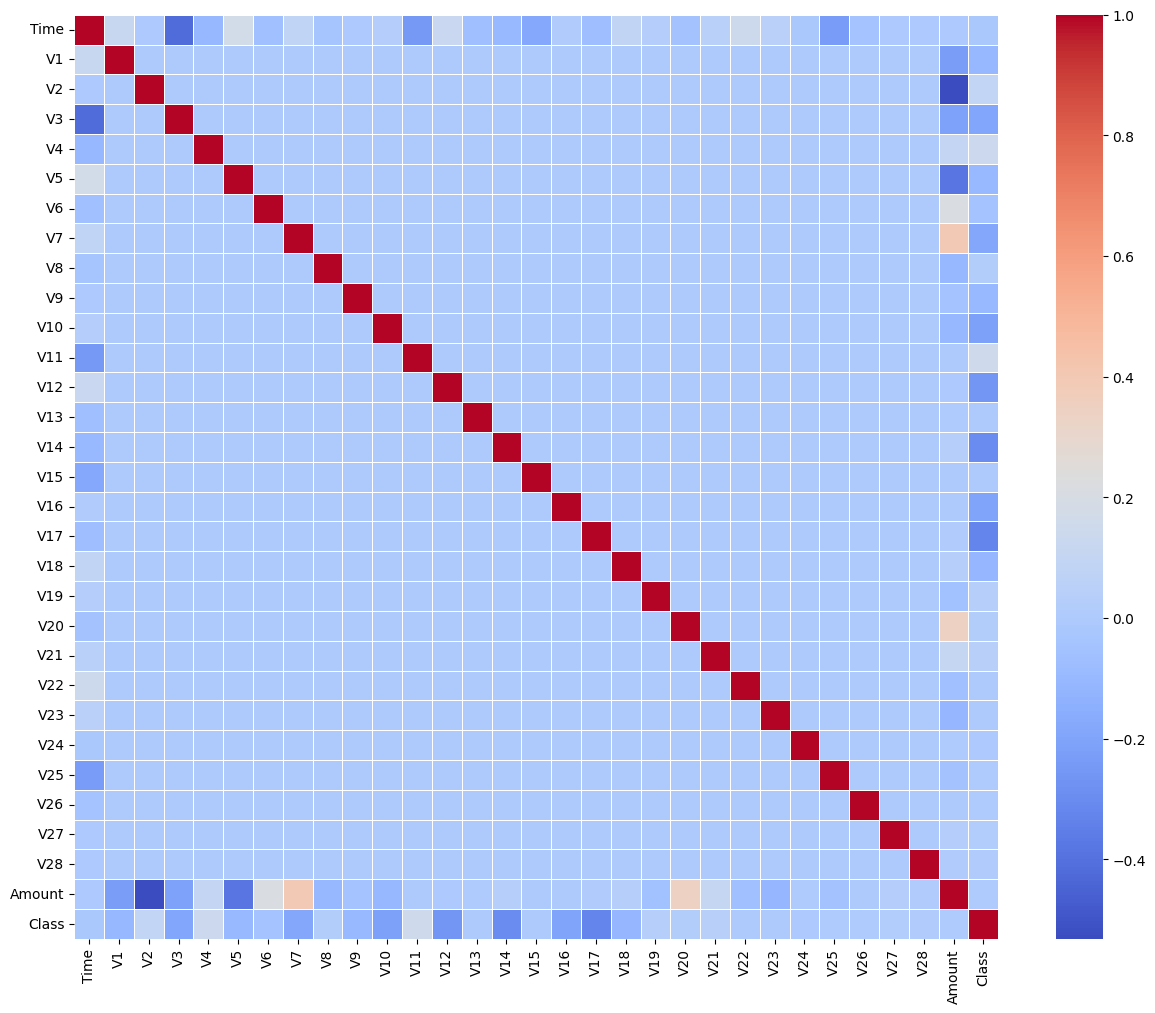

In [ ]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix
corr = df.corr()
plt.figure(figsize = (15,12))
sns.heatmap(data = corr ,square=True, cmap = 'coolwarm',linewidths=.5)

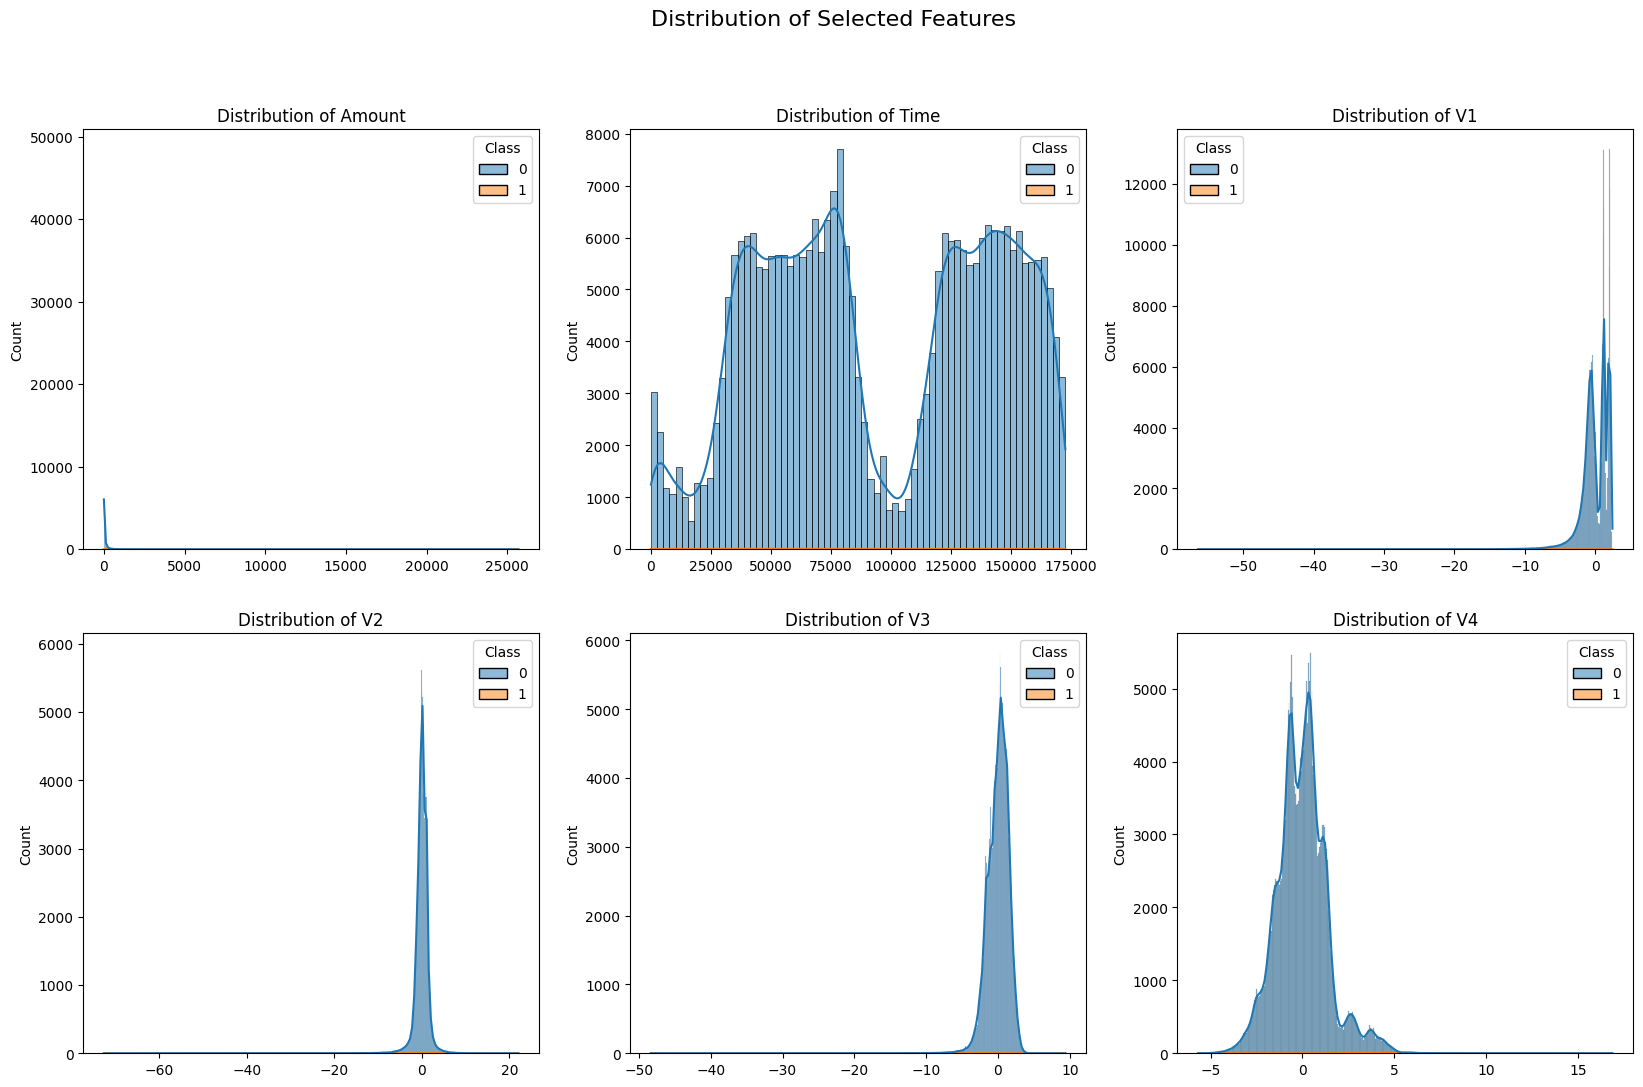

In [15]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features
# Seçilen özelliklerin listesi
selected_features = ['Amount','Time', 'V1', 'V2', 'V3', 'V4']

# Veriyi uzun forma dönüştür
df_melted = df[selected_features + ['Class']].melt(id_vars='Class', var_name='Feature', value_name='Value')

# Alt grafikler oluşturuluyor
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Distribution of Selected Features', fontsize=16)

# Her bir özellik için döngü
for i, feature in enumerate(selected_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # İlgili özellik için veriyi filtrele
    sns.histplot(data=df_melted[df_melted['Feature'] == feature], x='Value', hue='Class', kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Alt grafiklerin düzenlenmesi
plt.tight_layout(rect=[1, 0, 1, 0.95])
plt.show()


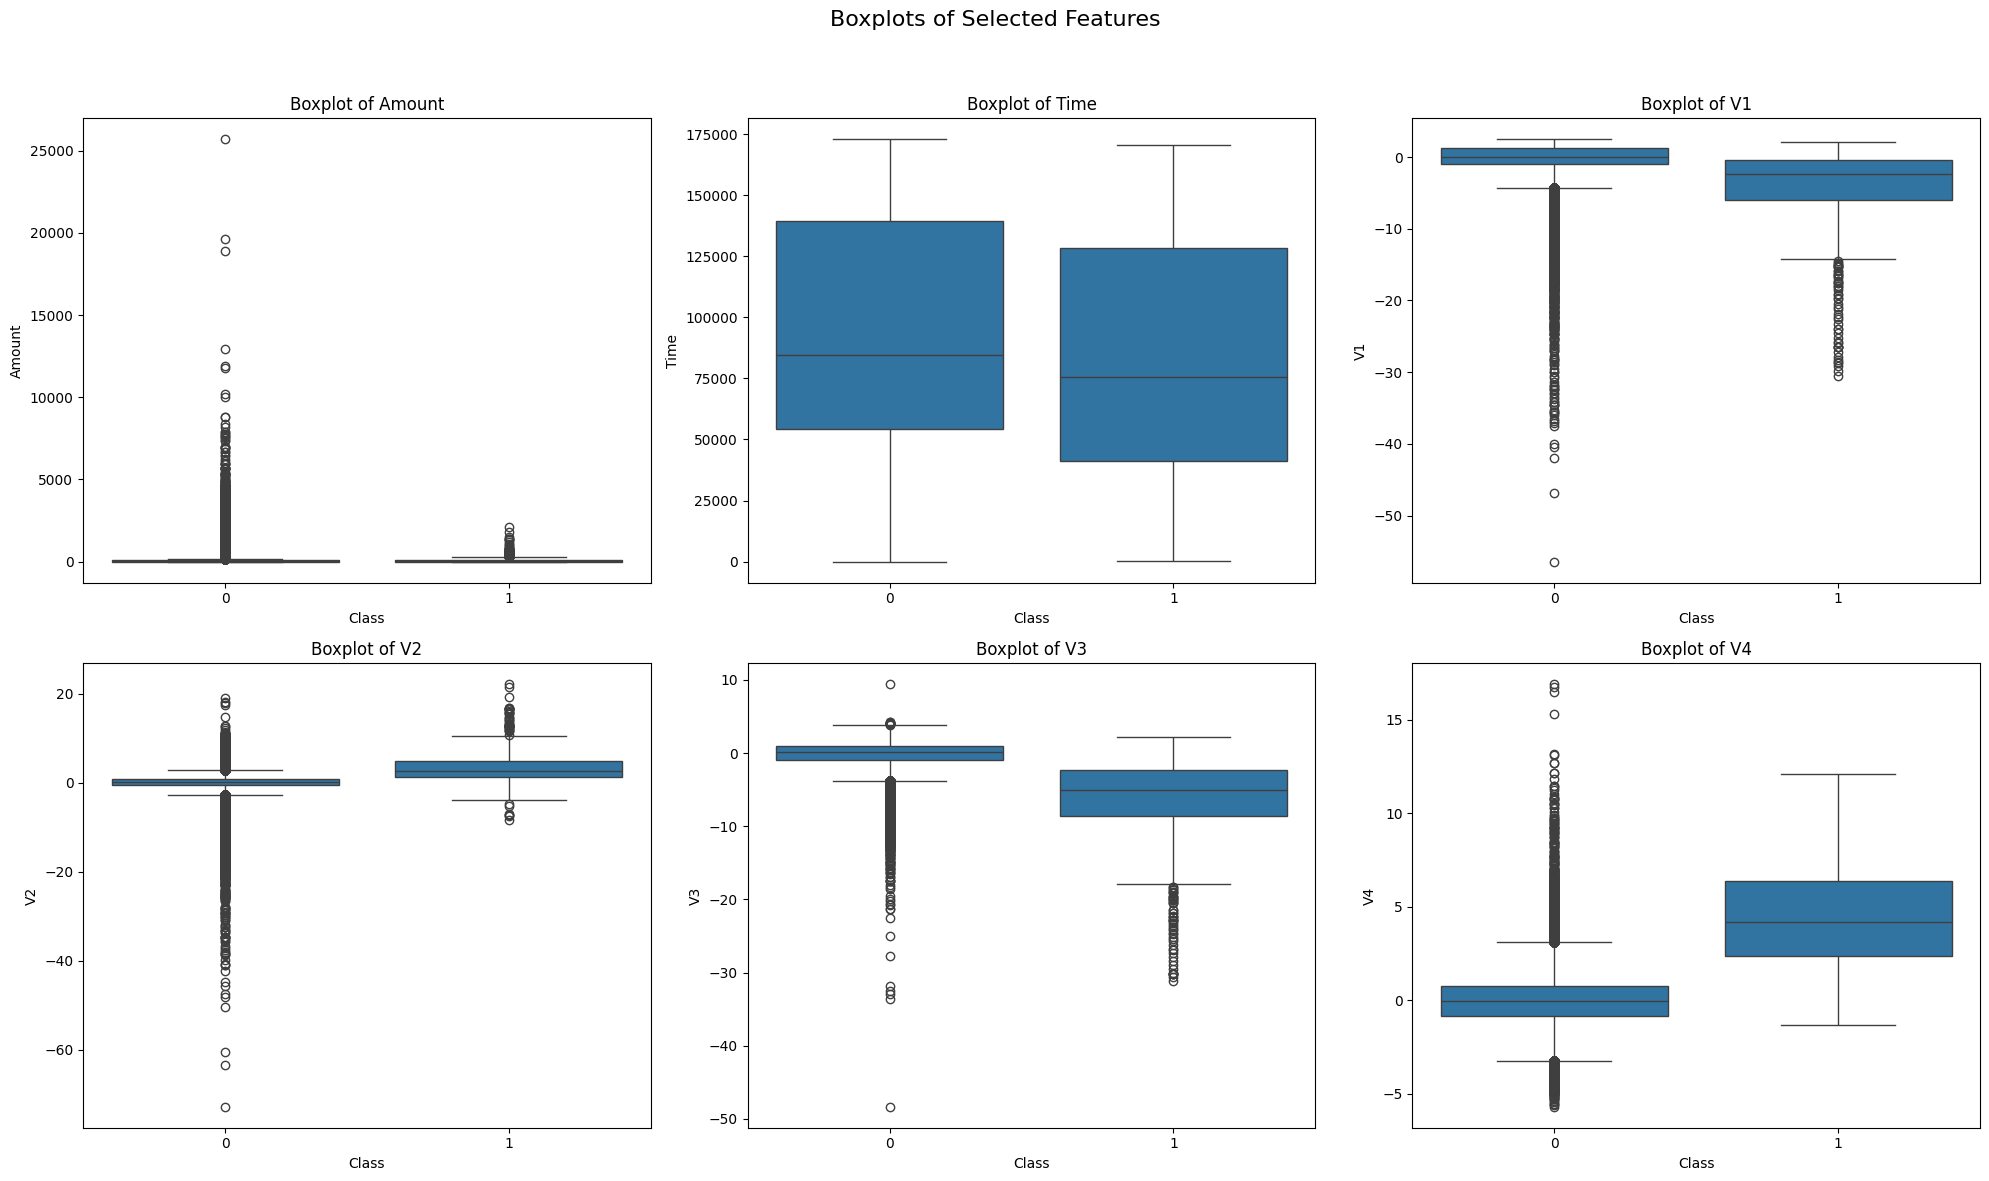

In [20]:
# Seçilen özelliklerin kutu grafiğinin oluşturulması
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('Boxplots of Selected Features', fontsize=16)

# Her bir özellik için döngü
for i, feature in enumerate(selected_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # İlgili özellik için kutu grafiği
    sns.boxplot(data=df, x='Class', y=feature, ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

# Alt grafiklerin düzenlenmesi
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:** 1. Major Challenges in the Dataset:

Based on the Exploratory Data Analysis (EDA), two major challenges in the dataset are:

Imbalance in the Class Distribution:

The dataset shows a significant imbalance between the classes, with one class (Class 0) being heavily overrepresented compared to the other (Class 1). This imbalance can lead to biased model predictions where the model might be more inclined to predict the majority class, ignoring the minority class. This challenge requires special techniques like resampling, using different evaluation metrics (e.g., Precision-Recall), or applying algorithms that are robust to class imbalance.
Outliers in Certain Features:

During the EDA, the boxplots revealed the presence of several outliers in features such as Amount and Time. Outliers can negatively affect the performance of certain machine learning algorithms, particularly those sensitive to data distribution, such as linear regression and k-nearest neighbors. Addressing these outliers, either through transformation, removal, or using robust algorithms, is necessary to ensure accurate model predictions.
2. Analysis of the Correlation Matrix:

The correlation matrix of the selected features (Amount, Time, V1, V2, V3, V4) shows varying degrees of correlation between them. For example:
V1 and V2 might exhibit a strong positive correlation, indicating that as one increases, the other tends to increase as well.
Some features, like Time, may have a weak or near-zero correlation with other features, suggesting that it might not provide significant linear information in relation to others.
High correlations between features can indicate multicollinearity, which can be problematic for certain models like linear regression. This would require techniques like dimensionality reduction (e.g., PCA) or regularization methods to mitigate.
3. Linear Separability of the Data:

Is the Data Linearly Separable?

Based on the pairplot analysis, the data does not appear to be linearly separable. The classes overlap significantly in most feature pairs, which suggests that a linear model (like logistic regression) might struggle to effectively separate the classes using a linear decision boundary.
Rationale:

The lack of clear, distinct boundaries between classes in the feature space, as observed in the pairplots, implies that the data points from different classes are not well-separated by a straight line (or hyperplane in higher dimensions). Non-linear models, such as decision trees, random forests, or kernel-based methods (e.g., SVM with an RBF kernel), may be more effective in classifying the data due to their ability to capture complex relationships in the data.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [19]:
!pip install scikit-learn imbalanced-learn

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [22]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

In [25]:
# Gerekli kütüphanelerin içe aktarılması
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Dengesiz veri kümesi için SMOTE

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lojistik regresyon modelinin oluşturulması ve eğitimi (ölçeklendirilmiş veri ile)
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

# Dengesiz veri kümesi için SMOTE ile yeniden örnekleme
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# İkinci Lojistik regresyon modelinin oluşturulması ve eğitimi (yeniden örneklenmiş veri ile)
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Test seti üzerinde tahminler yapma
y_pred_lr = lr_model.predict(X_test_scaled)

# Modelin performansını değerlendirme
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



<Figure size 300x300 with 0 Axes>

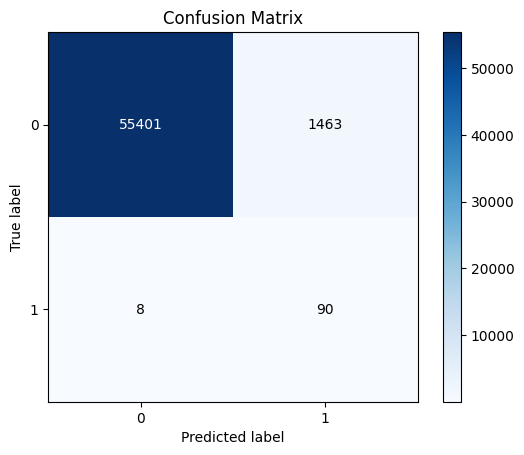

In [27]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Confusion matrix'in çizilmesi
plt.figure(figsize=(3, 3))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr)
plt.show()


### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42, max_iter=1000)
sgd_clf.fit(X_train_resampled, y_train_resampled)

SGDClassifier(random_state=42)

In [41]:

from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42, max_iter=1000)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred_svm = svm_model.predict(X_test_scaled)


print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



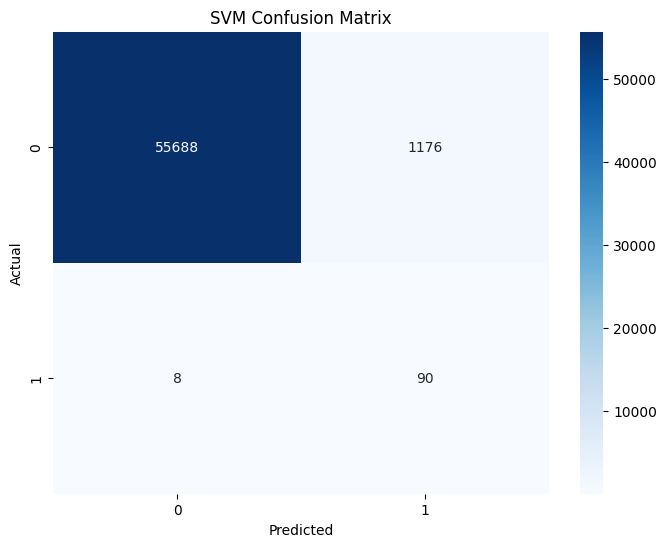

Cross-validation scores: [0.94688526 0.9463313  0.94628513]
Mean CV score: 0.947 (+/- 0.001)


In [42]:
# Confusion matrix görselleştirmesi
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# LinearSVC kullanarak çapraz doğrulama
svm_model = LinearSVC(random_state=42)
cv_scores = cross_val_score(svm_model, X_train_resampled, y_train_resampled, cv=3)  # cv=5 yerine cv=3 kullanarak sürenin kısalmasını sağlamak
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**  SVM vs Logistic Regression:

Model Complexity:

Logistic Regression: Simple and interpretable model that assumes a linear decision boundary between classes. Works well for linearly separable data but can be extended with regularization to prevent overfitting.
SVM: More flexible model that can handle non-linear boundaries through the use of kernel functions (e.g., RBF kernel). Can create complex decision boundaries and is effective in high-dimensional spaces.
Performance:

Logistic Regression: Generally performs well when the data is linearly separable or nearly linearly separable. It provides probabilities for class membership and is easy to interpret.
SVM: Often provides better performance on complex datasets with non-linear relationships due to its ability to find a decision boundary in higher dimensions. However, it may be computationally intensive and less interpretable.
Training Time:

Logistic Regression: Typically faster to train, especially on large datasets.
SVM: Training time can be longer, especially with large datasets or complex kernel functions.
Handling Class Imbalance:

Logistic Regression: Can handle class imbalance by adjusting class weights or using techniques like SMOTE.
SVM: Can handle class imbalance by adjusting class weights and is often robust due to its margin maximization principle.
Which One is Generally Better?

It Depends on the Problem:
SVM is generally better for complex or high-dimensional datasets where the decision boundary is non-linear.
Logistic Regression is preferred for simpler problems or when interpretability and computational efficiency are crucial.
Is Accuracy a Suitable Metric for Evaluating Performance?
Accuracy might not always be the most suitable metric, especially in cases of class imbalance. Here’s why:

Class Imbalance: In a dataset with imbalanced classes, a model that predicts the majority class for all instances can still achieve high accuracy, but it may perform poorly on the minority class. For example, if 90% of the data belongs to Class 0 and 10% to Class 1, a model that always predicts Class 0 would achieve 90% accuracy but would be useless for detecting Class 1.
Alternative Metrics:

Precision: Measures the proportion of true positives among the predicted positives. Important when false positives are costly.
Recall (Sensitivity): Measures the proportion of true positives among the actual positives. Crucial when missing positive cases is costly.
F1 Score: The harmonic mean of precision and recall, useful when you need a balance between them.
Enhancing Recall for the Dataset
If high recall is crucial (i.e., detecting as many positive cases as possible), consider the following recommendations:

Adjust Class Weights:

In both SVM and Logistic Regression, you can adjust class weights to give more importance to the minority class. For SVM, use class_weight='balanced'. For Logistic Regression, set the class_weight parameter accordingly.
Resampling Techniques:

Oversampling: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples of the minority class.
Undersampling: Reduce the number of examples from the majority class to balance the dataset.
Threshold Adjustment:

Modify the decision threshold of the classifier to increase the likelihood of predicting the positive class. This can be done by adjusting the threshold value used in making predictions.
Use Specialized Algorithms:

Consider using algorithms specifically designed to improve recall, such as ensemble methods (e.g., Random Forests) or models optimized for recall (e.g., certain types of boosting algorithms).
Cross-Validation:

Use cross-validation to ensure that changes to the model or metrics are evaluated on multiple subsets of the data, providing a more robust measure of performance.
Model Tuning:

Experiment with different hyperparameters and kernels (for SVM) or regularization strengths (for Logistic Regression) to find the best balance between precision and recall.

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

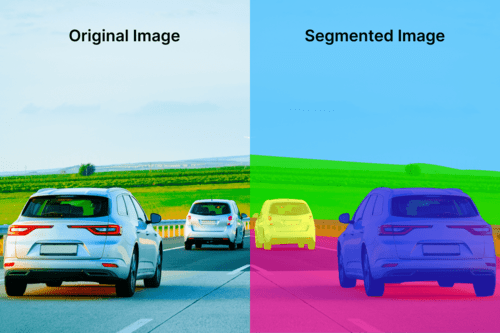

## Load Data

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 59.7MB/s]


In [28]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


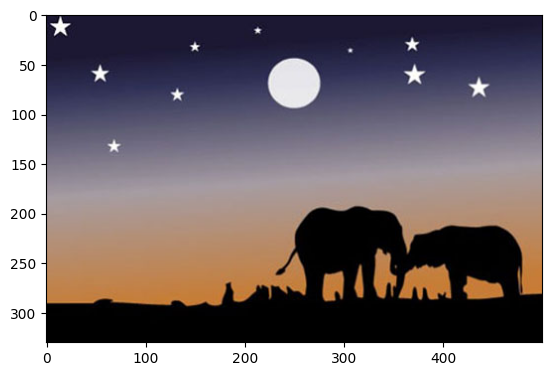

In [29]:
plt.imshow(im) # as RGB Format
plt.show()

In [30]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








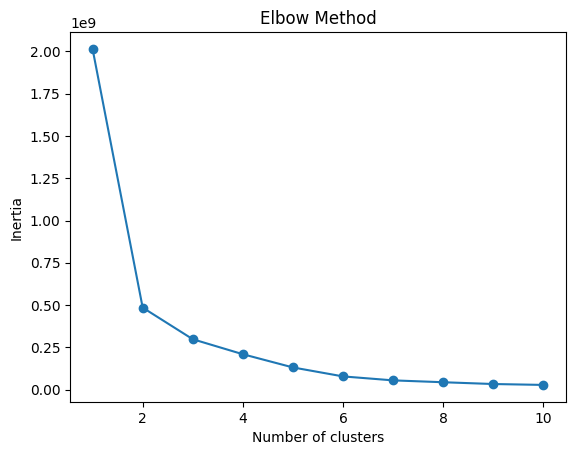

In [34]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(all_pixels)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

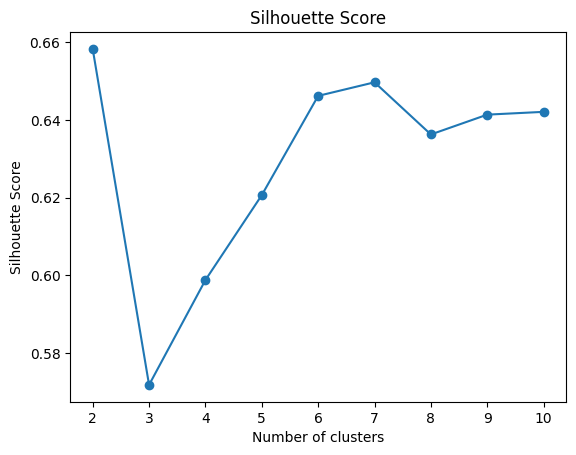

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Verinin örneklenmesi
sample_size = 10000
if all_pixels.shape[0] > sample_size:
    all_pixels_sample = all_pixels[np.random.choice(all_pixels.shape[0], sample_size, replace=False)]
else:
    all_pixels_sample = all_pixels

# Silhouette skorlarının hesaplanması
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(all_pixels_sample)
    score = silhouette_score(all_pixels_sample, kmeans.labels_)
    silhouette_scores.append(score)

# Sonuçların görselleştirilmesi
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [37]:

n_colors = 5
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(all_pixels)


dominant_colors = kmeans.cluster_centers_


## Visualize Dominant Color

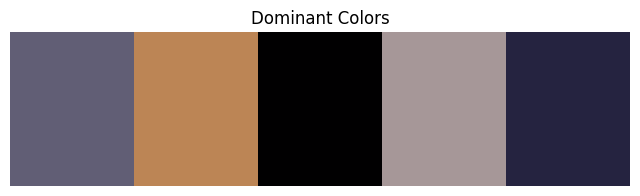

In [38]:

colors = dominant_colors.astype(int)
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
ax.imshow([colors], aspect='auto')
ax.set_title('Dominant Colors')
ax.axis('off')
plt.show()

## Segmenting original image

In [39]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


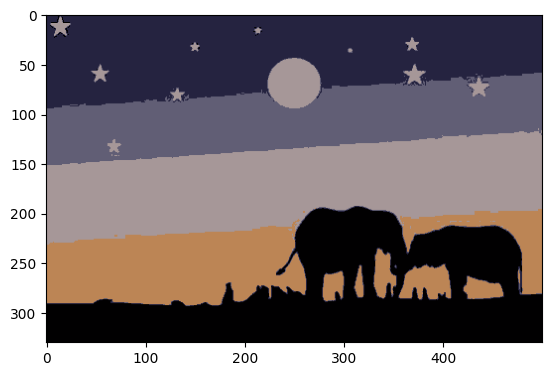

In [40]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()